# AccelerateAI: Logistic Regression

## Challenger Failure Use Case

The Challenger disaster occurred on the 28th January of 1986, when the NASA Space Shuttle orbiter Challenger broke apart and disintegrated at 73 seconds into its flight, leading to the deaths of its seven crew members. The accident had serious consequences for the NASA credibility and resulted in an interruption of 32 months in the shuttle program.

You can refer to the YouTube video here - https://www.youtube.com/watch?v=fSTrmJtHLFU

The Rogers Commission elaborated a report (Presidential Commission on the Space Shuttle Challenger Accident 1986) with all the findings. The commission determined that the disintegration began with the failure of an O-ring seal in the solid rocket booster due to the unusually cold temperature during the launch.

The purpose of this case study, inspired by Siddhartha, Fowlkes, and Hoadley (1989), is to quantify what was the influence of the temperature on the probability of having at least one incident related with the O-rings. Specifically, we want to address the following questions:

- Is the temperature associated with O-ring incidents?
- In which way was the temperature affecting the probability of O-ring incidents?
- What was the predicted probability of an incident in an O-ring for the temperature of the launch day(11 degree celcius)?

**About the Dataset:**

The dataset contains information regarding the state of the solid rocket boosters after launch for 23 flights. Each row has, among others, the following variables:
- ```fail.field```, ```fail.nozzle```: binary variables indicating whether there was an incident with the O-rings in the field joints or in the nozzles of the solid rocket boosters. 1 codifies an incident and 0 its absence. On the analysis, we focus on the O-rings of the field joint as being the most determinants for the accident.
- ```temp```: temperature in the day of launch. Measured in Celsius degrees.

And of course other details such as flight# and the date of launch.

We will be considering the failure outcome from field joint standpoint and the temperature associated with that instance.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

# A jupyter notebook specific command that let’s you see the plots in the notbook itself.
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./LR_Challenger_data.csv")

df.shape

(23, 5)

In [3]:
df.head(5)

,flight#,date,temp,fail.field,fail.nozzle
0,1,12-04-1981,18.9,0,0
1,2,12-11-1981,21.1,1,0
2,3,22-03-1982,20.6,0,0
3,5,11-11-1982,20.0,0,0
4,6,04-04-1983,19.4,0,1


In [4]:
df.rename(columns={'fail.field':'FailureOutcome','temp':'Temperature'},inplace=True)

In [5]:
df.head(5)

,flight#,date,Temperature,FailureOutcome,fail.nozzle
0,1,12-04-1981,18.9,0,0
1,2,12-11-1981,21.1,1,0
2,3,22-03-1982,20.6,0,0
3,5,11-11-1982,20.0,0,0
4,6,04-04-1983,19.4,0,1


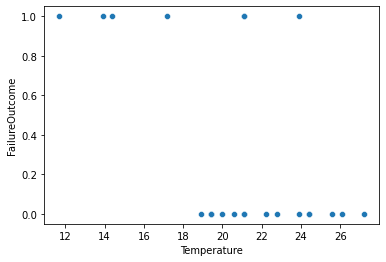

In [6]:
sns.scatterplot(df['Temperature'],df['FailureOutcome'])

plt.show()

In [7]:
model = sm.GLM.from_formula("FailureOutcome ~ Temperature", family=sm.families.Binomial(), data=df)

result = model.fit()

In [8]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         FailureOutcome   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.167
Date:                Sat, 10 Sep 2022   Deviance:                       20.335
Time:                        14:33:19   Pearson chi2:                     23.2
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2917
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.5837      3.915      1.937      

**Interpretation to Q1)** - Temperature seems to significant and is indeed affecting the probability of an incident with the O-rings.

p-value for Temperature is < 0.05 and hence siginificant.

In [9]:
x = df['Temperature']

Fitted logistic regression model is

log (p/1-p) = 7.5837 - 0.4166x

exp(beta1) = exp(-0.4166) = 0.6593 => Every 1 Degree Celsius increase in Temp reduces the Odds of failure by 0.6593

That is p = 1 / 1 + exp(-(7.5837 - 0.4166x))

In [10]:
y = 1 / (1 + np.exp(-7.5837 + 0.4166 * x))

In [11]:
data = {'Temp': x,'IncidentFailure':y}

resultant_df = pd.concat(data, axis=1)

resultant_df.head()

,Temp,IncidentFailure
0,18.9,0.427994
1,21.1,0.230310
2,20.6,0.269284
3,20.0,0.321192
4,19.4,0.377931


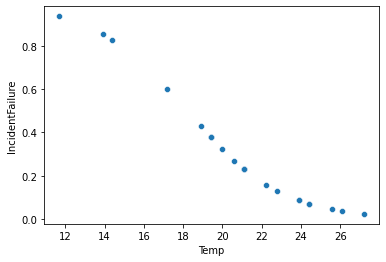

In [12]:
sns.scatterplot(data=resultant_df,x='Temp',y='IncidentFailure')

plt.show()

**Interpretation to Q2)** - The incident probability is proportional to the Temperature and that can be seen from above chart

**Interpretation to Q3)** - Finally, the predicted probability of an incident in an O-ring for the temperature of the launch day (considering 11 degree celcius) according to the fitted logistic model can be determined. This can be easily obtained as per below which is approximately 95.26%

In [13]:
# Considering 11 Degree Celsius of Temp value on Launch Day
x_i = 11 

# We can plug in values to get Probability
prob = 1 / (1 + np.exp(-7.5837 + 0.4166 * x_i))

prob

0.9526237964160386